In [9]:
# importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
# viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


• looks like our dataset has no NaNs! • Overview, Original_Language and Poster-Url wouldn't be so useful during analysis\
• Release_Date column needs to be casted into date time and to extract only the year value

In [12]:
# exploring genres column
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

• genres are saperated by commas followed by whitespaces.

In [13]:
# check for duplicated rows
df.duplicated().sum()

np.int64(0)

• our dataset has no duplicated rows either.

In [14]:
# exploring summary statistics
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [ ]:
# Data Cleaning

Casting Release_Date column and extracing year values

In [15]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [21]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

# confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [22]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('float64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   float64
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(2), object(7)
memory usage: 691.8+ KB


In [24]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [28]:
# making list of column to be dropped
# Check if columns exist before dropping them
cols_to_drop = []
for col in ['Overview', 'Original_Language', 'Poster_Url']:
    if col in df.columns:
        cols_to_drop.append(col)

# dropping columns and confirming changes
if cols_to_drop:  # Only drop if there are columns to drop
    df.drop(cols_to_drop, axis=1, inplace=True)
    
# Display columns to confirm changes
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Poster_Url\r'],
      dtype='object')

In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url\r
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,2618.087,122,6.3,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#### categorizing Vote_Average column

We would cut the Vote_Average values and make 4 categories: popular average below_avg not_popular to describe it more using\
catigorize_col() function provided above.

In [33]:
def catigorize_col (df, col, labels):
 """
 catigorizes a certain column based on its quartiles

 Args:
 (df) df - dataframe we are proccesing
 (col) str - to be catigorized column's name
 (labels) list - list of labels from min to max

 Returns:
 (df) df - dataframe with the categorized col
 """

 # setting the edges to cut the column accordingly
 edges = [df[col].describe()['min'],
          df[col].describe()['25%'],
          df[col].describe()['50%'],
          df[col].describe()['75%'],
          df[col].describe()['max']]
 df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
 return df

In [41]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']

# First, ensure Vote_Average is numeric
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

# Drop NaN values that might have been introduced if some values couldn't be converted
df = df.dropna(subset=['Vote_Average'])

# Assuming we want to divide the range into equal parts
min_val = df['Vote_Average'].min()
max_val = df['Vote_Average'].max()
step = (max_val - min_val) / len(labels)
edges = [min_val + i * step for i in range(len(labels) + 1)]

# categorize column based on labels and edges
df['Vote_Average'] = pd.cut(df['Vote_Average'], bins=edges, labels=labels)

# confirming changes
df['Vote_Average'].unique()

['popular', 'average', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [42]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url\r
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,2618.087,122,average,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [43]:
# exploring column
df['Vote_Average'].value_counts()

Vote_Average
average        7978
popular        1156
below_avg       568
not_popular      24
Name: count, dtype: int64

In [44]:
# dropping NaNs
df.dropna(inplace = True)
# confirming
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
Poster_Url\r    0
dtype: int64

In [45]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url\r
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,2618.087,122,average,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [46]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')

# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url\r
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022.0,The Batman,3827.658,1151,popular,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022.0,The Batman,3827.658,1151,popular,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [47]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')

# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  float64 
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  object  
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
   25551 non-null  object  
dtypes: category(2), float64(2), object(3)
memory usage: 1.0+ MB


In [49]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
Poster_Url\r    9726
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25551
rows to dig into during our analysis

# Data Visualization

Here, we'd use Matplotlib and seaborn for making some informative visuals to gain
insights abut our data.

In [50]:
# setting up seaborn configurations
sns.set_style('whitegrid')

# Q1: What is the most frequent genre in the dataset?

In [51]:
# showing stats. on genre column
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

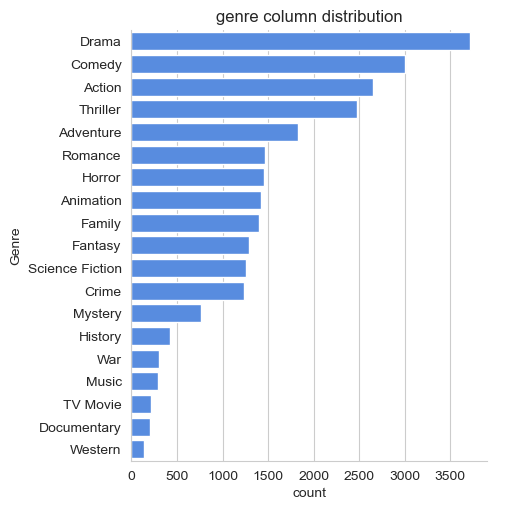

In [52]:
# visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().index, 
            color = '#4287f5')
plt.title('genre column distribution')
plt.show()

* we can notice from the above visual that Drama genre is the most frequent genre\
in our dataset and has appeared more than 14% of the times among 19 other
genres.

# Q2: What genres has highest votes ?

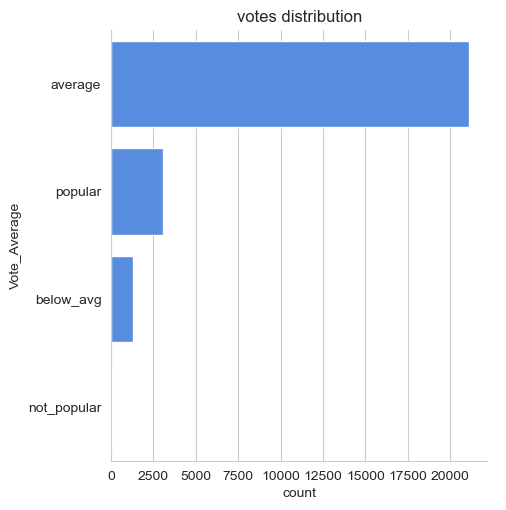

In [53]:
# visualizing vote_average column
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('votes distribution')
plt.show()

# Q3: What movie got the highest popularity ? what's its genre ?

In [54]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url\r
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...


# Q4: What movie got the lowest popularity? what's its genre?

In [55]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url\r
25545,2021.0,The United States vs. Billie Holiday,13.354,152,average,Music,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25546,2021.0,The United States vs. Billie Holiday,13.354,152,average,Drama,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25547,2021.0,The United States vs. Billie Holiday,13.354,152,average,History,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25548,1984.0,Threads,13.354,186,popular,War,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25549,1984.0,Threads,13.354,186,popular,Drama,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25550,1984.0,Threads,13.354,186,popular,Science Fiction,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


# Q5: Which year has the most filmmed movies?

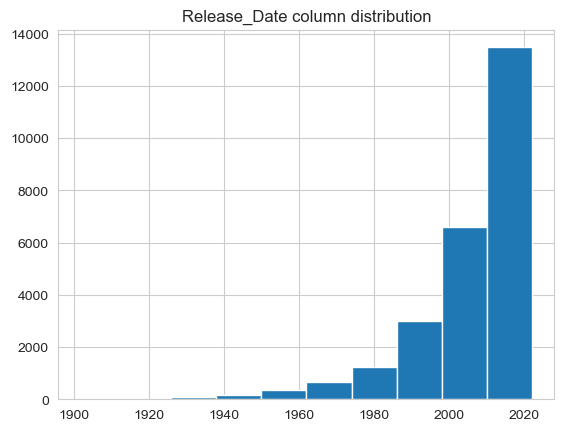

In [56]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()